<a href="https://colab.research.google.com/github/yingyingchen/GeoexperimentsResearch/blob/master/Copy_of_%5BMAKE_A_COPY%5D_Geo_Experiments_in_R_trunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pre-requisites

1.   Ceate Fork of google/GeoexperimentsResearch in your Github account
2.   Go to copy of repository
3.   Go into to "data" folder
4.   Delete "salesandcost.rda" and "geoassignment.rda" files
5.   Upload pre-period sales and cost data named "salesandcost.rda" as an .rda file (need R)

## Load Packages

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

install.packages("devtools")
install.packages("usethis")
library(usethis)
library(devtools)
library(readr)
install_github("gloyoo1/GeoexperimentsResearch") #replace with your own Github
library(GeoexperimentsResearch)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/devtools_2.4.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 372413 bytes (363 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

* checking for file ‘/tmp/RtmpOX9rsV/remotes3c959a7f0/gloyoo1-GeoexperimentsResearch-bb02680/DESCRIPTION’ ... OK
* preparing ‘GeoexperimentsResearch’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘GeoexperimentsResearch_1.0.3.tar.gz’



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: This software is not an official Google product. For research purposes only. Copyright 2017 Google, Inc.



## Preview Pre-Period Sales and Cost Data

In [3]:
%%R 

data(salesandcost)
obj.gts <- GeoTimeseries(salesandcost, metrics=c("sales", "cost"))
head(obj.gts)

        date geo   sales cost .weekday .weeknum .weekindex
1 2015-01-05   1 7227.32    0        1        1     201501
2 2015-01-05  10 1827.21    0        1        1     201501
3 2015-01-05 100   23.98    0        1        1     201501
4 2015-01-05  11 1501.10    0        1        1     201501
5 2015-01-05  12 1371.61    0        1        1     201501
6 2015-01-05  13 1366.81    0        1        1     201501


## Geo Assignments

### Stratified randomization:

In [4]:
%%R

obj.geo.strata <- ExtractGeoStrata(obj.gts, volume="sales", n.groups=2)
head(obj.geo.strata)

  geo stratum geo.group proportion   volume    sales     cost
1   1       1        NA 0.11180683 44690.98 44690.98 774.9707
2   2       1        NA 0.09195421 36755.57 36755.57   0.0000
3   3       2        NA 0.07783086 31110.24 31110.24   0.0000
4   4       2        NA 0.06877094 27488.85 27488.85 485.7571
5   5       3        NA 0.04748058 18978.75 18978.75   0.0000
6   6       3        NA 0.03869424 15466.71 15466.71 272.3836


### Randomized geo assignment:

In [5]:
%%R

obj.geo.assignment <- Randomize(obj.geo.strata)
head(obj.geo.assignment)

  geo stratum geo.group proportion   volume    sales     cost
1   1       1         2 0.11180683 44690.98 44690.98 774.9707
2   2       1         1 0.09195421 36755.57 36755.57   0.0000
3   3       2         1 0.07783086 31110.24 31110.24   0.0000
4   4       2         2 0.06877094 27488.85 27488.85 485.7571
5   5       3         2 0.04748058 18978.75 18978.75   0.0000
6   6       3         1 0.03869424 15466.71 15466.71 272.3836


Export geo assignments .csv file to Colab root folder:

In [6]:
%%R

write.csv(obj.geo.strata, file='geoassignment.csv')

## Precision

In [ ]:
%%R

obj.pre <-  DoROASPreanalysis(obj.gts, response="sales",
                              geos=obj.geo.assignment,
                              prop.to="sales",
                              period.lengths=c(42, 21, 7))

results <- summary(obj.pre,
              level=0.90,
              type="one-sided",
              precision=1.0)
print(results)

The function can be also used to predict the precision given a (total) spend
change over the test period:

In [ ]:
%%R

results2 <- summary(obj.pre,
                level=0.90,
                type="one-sided",
                cost=10000)
print(results2)

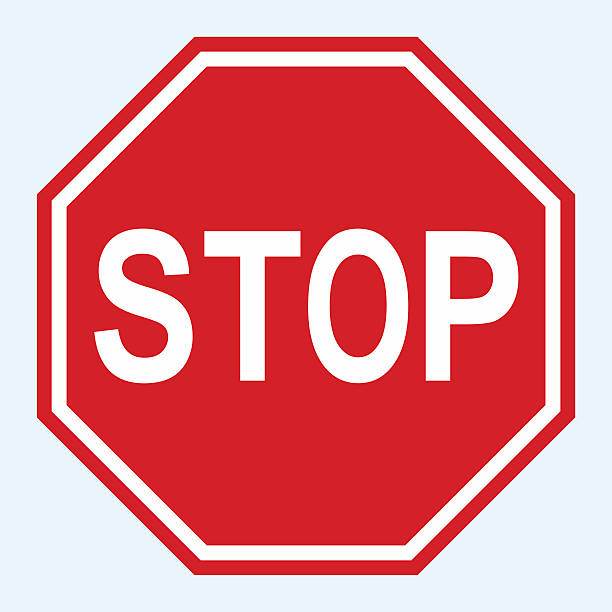

# **MUST UPLOAD GEO ASSIGNMENTS AND UPDATED SALES AND COST DATA TO GITHUB BEFORE PROCEEDING**

1.   Go into to "data" folder in Github account
2.   Delete "salesandcost.rda" and "geoassignment.rda" files
3.   Upload pre-test and test periods sales and cost data named "salesandcost.rda" and geo assignments as "geoassignment.rda" as .rda files (need R)

## Preview Pre-Test and Test Periods Sales and Cost Data

In [ ]:
%%R 

data(salesandcost)
obj.gts <- GeoTimeseries(salesandcost, metrics=c("sales", "cost"))
head(obj.gts)

        date geo   sales cost .weekday .weeknum .weekindex
1 2015-01-05   1 7227.32    0        1        1     201501
2 2015-01-05  10 1827.21    0        1        1     201501
3 2015-01-05 100   23.98    0        1        1     201501
4 2015-01-05  11 1501.10    0        1        1     201501
5 2015-01-05  12 1371.61    0        1        1     201501
6 2015-01-05  13 1366.81    0        1        1     201501


## Input Experiment Dates

In [ ]:
%%R

obj.per <- ExperimentPeriods(c("2015-01-05", "2015-02-16", "2015-03-15")) #for cool down period, add end date
obj.per

  Period    Name      Start        End Length
1      0 Pretest 2015-01-05 2015-02-15     42
2      1    Test 2015-02-16 2015-03-15     28


## Preview Geo Assignments

In [ ]:
%%R

data(geoassignment)
obj.ga <- GeoAssignment(geoassignment)
head(obj.ga)

   geo geo.group
1    1         2
13   2         1
24   3         1
35   4         2
46   5         1
57   6         2


## Combining all information about the experiment into one object

In [ ]:
%%R

obj <- GeoExperimentData(obj.gts,
                          periods=obj.per,
                          geo.assignment=obj.ga)
head(obj)

        date geo period geo.group assignment   sales cost .weekday .weeknum
1 2015-01-05   1      0         2         NA 7227.32    0        1        1
2 2015-01-05  10      0         1         NA 1827.21    0        1        1
3 2015-01-05 100      0         1         NA   23.98    0        1        1
4 2015-01-05  11      0         1         NA 1501.10    0        1        1
5 2015-01-05  12      0         2         NA 1371.61    0        1        1
6 2015-01-05  13      0         1         NA 1366.81    0        1        1
  .weekindex
1     201501
2     201501
3     201501
4     201501
5     201501
6     201501


The column *period* contains the indicator for the experiment periods: 0 =
Pretest, 1 = test (Intervention). 'NA' marks a date that is outside of the
designated experiment periods.

The column *geo.group* contains the geo group ID for each of the geos.

The column *assignment* is not used in this version of the R package. It is set
to *NA* by default. It can be ignored.

The default threshold is 0.

## Time-Based Regression (TBR) ROAS Analysis

The GeoExperimentData object can also be used for performing a TBR analysis [3],
applying method *DoTBRROASAnalysis*, specifying which of the metrics is the
response and which represents the cost, along with the experiment period and
group numbers. The model ID is also required; currently the only available
model is 'tbr1', as described in [3].

In [ ]:
%%R

obj.tbr.roas <- DoTBRROASAnalysis(obj, response='sales', cost='cost',
                                  model='tbr1',
                                  pretest.period=0,
                                  intervention.period=1,
                                  cooldown.period=NULL,
                                  control.group=1,
                                  treatment.group=2)
obj.tbr.roas

      estimate precision    lower upper level incr.resp incr.cost thres prob
iROAS 2.946742  0.120548 2.826194   Inf   0.9  147337.1     50000     0    1
      model
iROAS  tbr1


The resulting object (a *TBRROASAnalysisFit* object) contains the model fit:
when printed, it shows its summary, which defaults to 90 percent one-sided
credible intervals. Similarly to what we did with a *GBRROASAnalysisFit* object
we can recalculate the credible interval, and the probability of exceeding a
given threshold like so:

In [ ]:
%%R

summary(obj.tbr.roas, level=0.95, interval.type="two-sided")

      estimate precision    lower    upper level incr.resp incr.cost thres prob
iROAS 2.946742 0.1869702 2.759772 3.133713  0.95  147337.1     50000     0    1
      model
iROAS  tbr1


In [ ]:
%%R

summary(obj.tbr.roas, threshold=3.0)

      estimate precision    lower upper level incr.resp incr.cost thres  prob
iROAS 2.946742  0.120548 2.826194   Inf   0.9  147337.1     50000     3 0.284
      model
iROAS  tbr1


The *plot* method shows the evolution of the iROAS estimate across the Test
period:

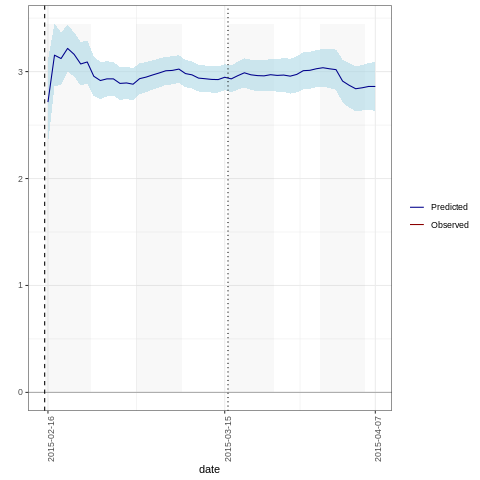

In [ ]:
%%R

plot(obj.tbr.roas)

For more information on the method, type
`?plot.TBRROASAnalysisFit` at the R prompt.



## Time-Based Regression (TBR) Causal Effect Analysis

Unlike the TBR ROAS Analysis, which estimates the ratio of the incremental
response and incremental cost, the TBR Causal Effect Analysis applies only to
one single variable, such as revenue.

In [ ]:
%%R

obj.tbr <- DoTBRAnalysis(obj, response='sales',
                           model='tbr1',
                           pretest.period=0,
                           intervention.period=1,
                           cooldown.period=NULL,
                           control.group=1,
                           treatment.group=2)

The resulting object (a *TBRAnalysisFitTbr1* object) contains the model fit for
each time point, which can be seen when printed. To show the summary of the
effect, we use the *summary* method:

In [ ]:
%%R

summary(obj.tbr)

            estimate precision    lower upper       se level thres prob model
incremental 147337.1  6027.401 141309.7   Inf 4625.514   0.9     0    1  tbr1


which defaults to the 90% one-sided interval.

The *plot* method illustrates the results of the analysis.

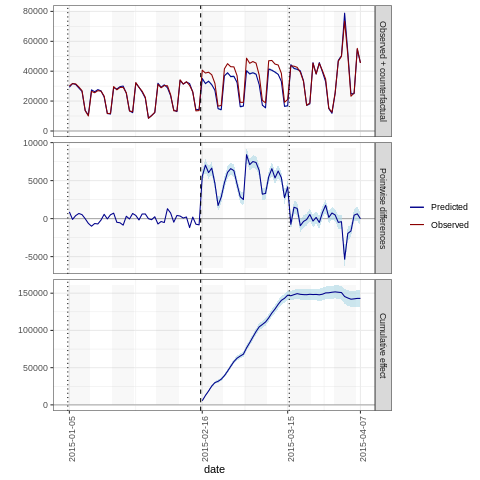

In [ ]:
%%R

plot(obj.tbr)

# References

[1] Kerman, J., Vaver, J. and Koehler, J. (2011)
    [Estimating causal effects using geo experiments](http://www.unofficialgoogledatascience.com/2016/06/estimating-causal-effects-using-geo.html)

[2] Vaver, J. and Koehler, J. (2011)
    [Measuring Ad Effectiveness Using Geo Experiments](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/38355.pdf)

[3] Kerman, J. and Wang, P., and Vaver, J. (2017)
    [Estimating Ad Effectiveness using Geo Experiments in a Time-Based Regression Framework](https://research.google.com/pubs/pub45950.html)

[4] R Vignette:
    [GeoexperimentsResearch version 1.0](https://github.com/google/GeoexperimentsResearch/blob/master/vignettes/GeoexperimentsResearch-vignette.Rmd)
# Disclaimer
This software is not an official Google product. For research purposes only. Copyright 2017 Google, Inc.